In [1]:
# pip install numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
import os
import tensorflow as tf
tf.__version__

'2.6.0'

In [2]:
df = pd.read_csv('AAPL.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [3]:
df = df['close'].values
df = df.reshape(-1,1)
print(df.shape)
df[:7]

(1259, 1)


array([[67.8542],
       [68.5614],
       [66.8428],
       [66.7156],
       [66.6556],
       [65.7371],
       [65.7128]])

In [4]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-50:])

In [5]:
dataset_test.shape

(302, 1)

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:7]

array([[0.15625287],
       [0.1654123 ],
       [0.14315355],
       [0.1415061 ],
       [0.140729  ],
       [0.12883289],
       [0.12851816]])

In [7]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:7]

array([[0.72529501],
       [0.72244564],
       [0.72102095],
       [0.70884638],
       [0.69550616],
       [0.70081634],
       [0.69058452]])

In [8]:
def create_my_dataset(df):
    x = []
    y = []
    for i in range(50,df.shape[0]):
        x.append(df[i-50:i,0])
        y.append(df[i,0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [9]:
x_train,y_train = create_my_dataset(dataset_train)
x_train[:1]

array([[0.15625287, 0.1654123 , 0.14315355, 0.1415061 , 0.140729  ,
        0.12883289, 0.12851816, 0.10790687, 0.10274433, 0.11153334,
        0.09671274, 0.10812834, 0.09998692, 0.0941224 , 0.07389966,
        0.0546198 , 0.07514561, 0.06500315, 0.07410688, 0.07621153,
        0.08759087, 0.07012425, 0.0699766 , 0.07765564, 0.0983032 ,
        0.12061764, 0.11834203, 0.11388277, 0.11508468, 0.1320708 ,
        0.13515978, 0.13063835, 0.11388277, 0.0964537 , 0.07101273,
        0.07264464, 0.07671147, 0.06881095, 0.06044805, 0.06601727,
        0.06744195, 0.08355772, 0.08104121, 0.07265889, 0.05424938,
        0.06607296, 0.02270299, 0.0028131 , 0.        , 0.0150615 ]])

In [10]:
x_train[:1].shape

(1, 50)

In [11]:
x_test,y_test = create_my_dataset(dataset_test)
x_test[:1]

array([[0.72529501, 0.72244564, 0.72102095, 0.70884638, 0.69550616,
        0.70081634, 0.69058452, 0.70146393, 0.71545173, 0.72956906,
        0.75327062, 0.74485203, 0.7693307 , 0.7693307 , 0.77749025,
        0.779433  , 0.78811062, 0.79212564, 0.79355033, 0.78357754,
        0.78655642, 0.79614066, 0.78966482, 0.78927627, 0.77749025,
        0.7817643 , 0.78008059, 0.78772207, 0.80455925, 0.81854706,
        0.82010126, 0.82839033, 0.82191449, 0.81919464, 0.83162825,
        0.83149873, 0.82877888, 0.83162825, 0.83266438, 0.8312397 ,
        0.85597739, 0.85675449, 0.85688401, 0.85273947, 0.849113  ,
        0.94495539, 0.94210602, 0.94922944, 0.96490097, 0.98096104]])

In [13]:
#x_train.shape
#(957,50,1)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
print(x_train.shape)
print(x_test.shape)

(957, 50, 1)
(252, 50, 1)


In [12]:
model = Sequential()

model.add(LSTM(96,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.3))

model.add(LSTM(96,return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(96))
model.add(Dropout(0.3))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 96)            37632     
_________________________________________________________________
dropout (Dropout)            (None, 50, 96)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 96)            74112     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 96)                74112     
_________________________________________________________________
dropout_2 (Dropout)          (None, 96)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 9

In [15]:
model.compile(loss = 'mean_squared_error', optimizer='adam')

In [16]:
model.fit(x_train,y_train, epochs=60, batch_size=32)

Epoch 1/60
30/30 [==============================] - 6s 82ms/step - loss: 0.0438
Epoch 2/60
30/30 [==============================] - 2s 82ms/step - loss: 0.0066
Epoch 3/60
30/30 [==============================] - 2s 76ms/step - loss: 0.0055
Epoch 4/60
30/30 [==============================] - 2s 75ms/step - loss: 0.0054
Epoch 5/60
30/30 [==============================] - 2s 79ms/step - loss: 0.0059
Epoch 6/60
30/30 [==============================] - 3s 87ms/step - loss: 0.0057
Epoch 7/60
30/30 [==============================] - 2s 82ms/step - loss: 0.0064
Epoch 8/60
30/30 [==============================] - 2s 79ms/step - loss: 0.0054
Epoch 9/60
30/30 [==============================] - 2s 76ms/step - loss: 0.0055
Epoch 10/60
30/30 [==============================] - 3s 85ms/step - loss: 0.0046
Epoch 11/60
30/30 [==============================] - 2s 79ms/step - loss: 0.0049
Epoch 12/60
30/30 [==============================] - 3s 85ms/step - loss: 0.0046: 0s - loss: 0
Epoch 13/60
30/30 [====

In [17]:
losses = pd.DataFrame(model.history.history)

In [18]:
losses.head()

,loss
0,0.043800
1,0.006593
2,0.005502
3,0.005367
4,0.005883


<AxesSubplot:>

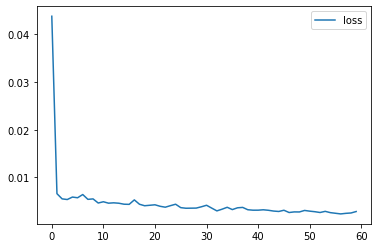

In [19]:
losses.plot()

In [20]:
model.save('stock_prection.h5')

In [23]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [26]:
predictions

array([[127.89009],
       [129.04196],
       [129.87221],
       [130.31786],
       [130.6299 ],
       [131.11002],
       [131.73021],
       [132.3027 ],
       [132.78278],
       [133.27385],
       [133.76906],
       [134.09537],
       [134.2683 ],
       [134.36795],
       [134.43256],
       [134.91743],
       [135.49913],
       [136.1347 ],
       [136.61223],
       [136.9182 ],
       [136.98615],
       [136.84769],
       [136.6918 ],
       [136.5891 ],
       [136.51642],
       [136.70778],
       [137.08894],
       [137.39877],
       [137.81586],
       [137.98207],
       [138.18694],
       [138.32892],
       [138.35744],
       [138.34595],
       [138.79143],
       [139.53941],
       [140.28534],
       [140.8093 ],
       [141.0851 ],
       [141.33649],
       [141.43057],
       [141.34586],
       [141.11624],
       [140.82104],
       [140.30367],
       [139.7638 ],
       [139.21094],
       [138.88155],
       [138.6724 ],
       [138.48259],


range(1007, 1259)


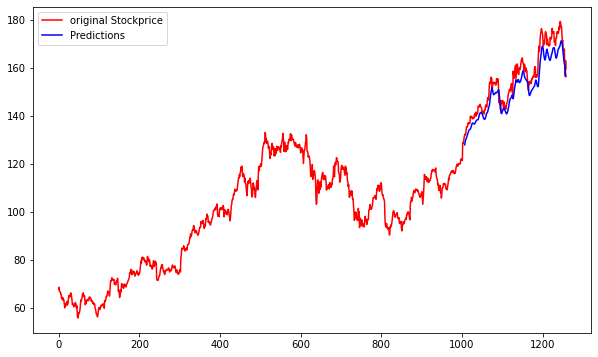

In [36]:
fig,ax = plt.subplots(figsize=(10,6))

plt.plot(df,color='red', label='original Stockprice')
ax.plot(range(len(y_train)+50, len(y_train)+50+len(predictions)),predictions, color='blue',label='Predictions')
plt.legend()
print(range(len(y_train)+50,len(y_train)+50+len(predictions)))

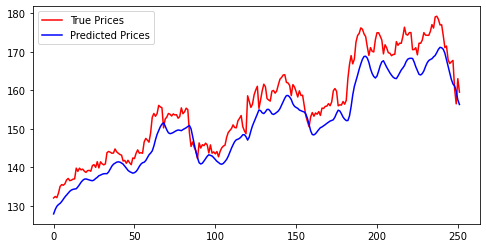

In [37]:
scaled_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

fig,ax = plt.subplots(figsize=(8,4))
ax.plot(scaled_ytest, color='red',label='True Prices')
plt.plot(predictions,color="blue",label = 'Predicted Prices')
plt.legend()